# Cat Detection

## Pip install

In [ ]:
!pip3 install torch torchvision

In [ ]:
!pip install opencv-python

In [ ]:
!pip install tqdm

## To be imported libs

In [1]:
from utils.utils import *
from tool.darknet2pytorch import Darknet
import gc 
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

## Check GPU

In [2]:
import torch

torch.cuda.current_device()

0

In [3]:
torch.cuda.device(0)

In [4]:
torch.cuda.device_count()

1

In [5]:
torch.cuda.get_device_name(0)

'GeForce GTX 960'

In [6]:
torch.cuda.is_available()

True

## Let's go!

In [7]:
use_cuda = False

In [8]:
font = cv2.FONT_HERSHEY_SIMPLEX 

In [9]:
vidcap = cv2.VideoCapture('video/gatos.mp4')
success,image = vidcap.read()
count = 0

images = []
while success:
    #cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file    
    image = cv2.resize(image,(960,540),interpolation=cv2.INTER_AREA)
    images.append(image)
    success,image = vidcap.read()
    #print('Read a new frame: ', success)
    count += 1

In [10]:
gc.collect() 

0

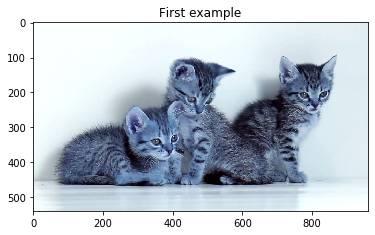

In [11]:
images = np.array(images)
plt.imshow(images[0])
plt.title('First example')
plt.show()

#### Detection

In [12]:
def detect(cfgfile, weightfile, img, use_cuda, verbose=1):
    m = Darknet(cfgfile)

    if verbose: m.print_network()
    m.load_weights(weightfile)
    if verbose: print('Loading weights from %s... Done!' % (weightfile))

    num_classes = 80
    if num_classes == 20:
        namesfile = 'data/voc.names'
    elif num_classes == 80:
        namesfile = 'data/coco.names'
    else:
        namesfile = 'data/names'

    if use_cuda:
        print("Using Cuda")
        m.cuda()

    sized = cv2.resize(img,(m.width, m.height),interpolation=cv2.INTER_AREA)

    for i in range(2):
        start = time.time()
        boxes = do_detect(m, sized, 0.5, 0.4, use_cuda)
        finish = time.time()
        if i == 1 and verbose:
            print('Predicted in {} seconds.'.format(finish - start))

    class_names = load_class_names(namesfile)
    boxed_img = box(img, boxes, class_names=class_names)
    return img,boxes,class_names, boxed_img

In [13]:
def box(image, boxes, class_names=None):
    colors = torch.FloatTensor([[1, 0, 1], [0, 0, 1], [0, 1, 1], [0, 1, 0], [1, 1, 0], [1, 0, 0]]);
    img = image.copy()
    
    width = img.shape[0]
    height = img.shape[1]

    for i in range(len(boxes)):
        box = boxes[i]
        x1,y1 = (box[0] - box[2] / 2.0) * width, (box[1] - box[3] / 2.0) * height
        x2,y2  = (box[0] + box[2] / 2.0) * width, (box[1] + box[3] / 2.0) * height
        
        #just swapping because people are stupid
        x1,y1 = y1,x1
        x2,y2 = y2,x2
        
        if len(box) >= 7 and class_names:
            cls_conf = box[5]
            cls_id = box[6]
            img = cv2.putText(img, str(class_names[cls_id]) , (int(x1),int(y1)), font, 1, (0,255,255), 2, cv2.LINE_AA)
        img = cv2.rectangle(img, (int(x2),int(y2)) , (int(x1),int(y1)), (255,0,255), 2) 

    return img


In [14]:
cfgfile = "cfg/yolov4.cfg"
weightfile = "weights/yolov4.weights"

In [15]:
img, boxes, class_names,boxed_img = detect(cfgfile,weightfile,images[0],use_cuda)

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152

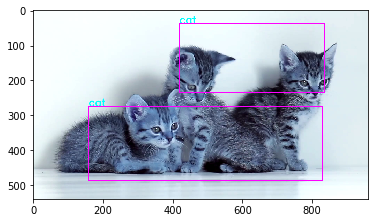

In [16]:
plt.imshow(boxed_img)
plt.show()

In [17]:
boxed_images = []
for image in tqdm(images):
    _, _, _,boxed_img = detect(cfgfile,weightfile,image,0)
    boxed_images.append(boxed_img)

  0%|          | 0/313 [00:00<?, ?it/s]

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152

  0%|          | 1/313 [00:01<08:00,  1.54s/it]

Predicted in 0.6158230304718018 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  1%|          | 2/313 [00:03<07:58,  1.54s/it]

Predicted in 0.6148109436035156 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  1%|          | 3/313 [00:04<07:55,  1.54s/it]

Predicted in 0.6094532012939453 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  1%|▏         | 4/313 [00:06<07:57,  1.55s/it]

Predicted in 0.6209146976470947 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  2%|▏         | 5/313 [00:07<07:57,  1.55s/it]

Predicted in 0.6308262348175049 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  2%|▏         | 6/313 [00:09<07:55,  1.55s/it]

Predicted in 0.6155152320861816 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  2%|▏         | 7/313 [00:10<07:55,  1.55s/it]

Predicted in 0.6272614002227783 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  3%|▎         | 8/313 [00:12<07:54,  1.56s/it]

Predicted in 0.6179320812225342 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  3%|▎         | 9/313 [00:14<07:57,  1.57s/it]

Predicted in 0.659512996673584 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x 

  3%|▎         | 10/313 [00:15<07:56,  1.57s/it]

Predicted in 0.6341562271118164 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  4%|▎         | 11/313 [00:17<07:56,  1.58s/it]

Predicted in 0.6248900890350342 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  4%|▍         | 12/313 [00:18<07:55,  1.58s/it]

Predicted in 0.6198265552520752 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  4%|▍         | 13/313 [00:20<07:53,  1.58s/it]

Predicted in 0.6263070106506348 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  4%|▍         | 14/313 [00:21<07:53,  1.59s/it]

Predicted in 0.6459062099456787 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  5%|▍         | 15/313 [00:23<07:52,  1.58s/it]

Predicted in 0.6250536441802979 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  5%|▌         | 16/313 [00:25<07:50,  1.59s/it]

Predicted in 0.6305699348449707 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  5%|▌         | 17/313 [00:26<07:51,  1.59s/it]

Predicted in 0.6292054653167725 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  6%|▌         | 18/313 [00:28<07:48,  1.59s/it]

Predicted in 0.6215267181396484 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  6%|▌         | 19/313 [00:29<07:46,  1.59s/it]

Predicted in 0.6426498889923096 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  6%|▋         | 20/313 [00:31<07:45,  1.59s/it]

Predicted in 0.6447732448577881 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  7%|▋         | 21/313 [00:33<07:44,  1.59s/it]

Predicted in 0.6426346302032471 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  7%|▋         | 22/313 [00:34<07:44,  1.60s/it]

Predicted in 0.6297433376312256 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  7%|▋         | 23/313 [00:36<07:42,  1.59s/it]

Predicted in 0.6238784790039062 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  8%|▊         | 24/313 [00:37<07:39,  1.59s/it]

Predicted in 0.6369204521179199 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  8%|▊         | 25/313 [00:39<07:35,  1.58s/it]

Predicted in 0.6272249221801758 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  8%|▊         | 26/313 [00:41<07:35,  1.59s/it]

Predicted in 0.6402742862701416 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  9%|▊         | 27/313 [00:42<07:35,  1.59s/it]

Predicted in 0.6245429515838623 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  9%|▉         | 28/313 [00:44<07:34,  1.59s/it]

Predicted in 0.6368424892425537 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

  9%|▉         | 29/313 [00:45<07:34,  1.60s/it]

Predicted in 0.6434872150421143 seconds.
convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64
    2 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    3 route  1
    4 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    5 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32
    6 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64
    7 shortcut 4
    8 conv     64  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  64
    9 route  8 2
   10 conv     64  1 x 1 / 1   304 x 304 x 128   ->   304 x 304 x  64
   11 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128
   12 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64
   13 route  11
   14 conv     64  1 x

 10%|▉         | 30/313 [00:47<07:30,  1.59s/it]

Predicted in 0.6286337375640869 seconds.
convalution havn't activate linear
convalution havn't activate linear


 10%|▉         | 30/313 [00:47<07:29,  1.59s/it]


KeyboardInterrupt: 

In [ ]:
def convert_frames_to_video(frame_array,pathOut,fps):
    #frame_array already ordered
    #for sorting the file names properly

    height, width, layers = frame_array[0].shape
    size = (width,height)
    
    try:
        out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    except:
        print('no video written')

    for i in range(len(frame_array)):
        
        # writing to a image array
        out.write(frame_array[i])
    out.release()

In [ ]:
width,height = img.shape[0], img.shape[1]
convert_frames_to_video(boxed_images,"prediction3.mp4",20)

In [ ]:
from IPython.display import Video

Video("prediction3.mp4", embed=True)